# Identify top 5 features which will be helpful for lending a loan

In [173]:
%matplotlib inline

In [169]:
import pandas as pd
import numpy as np

## DATA READING & UNDERSTANDING

In [174]:
lend=pd.read_csv('loan.csv',encoding='unicode_escape');

In [175]:
lend.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [176]:
lend.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [177]:
lend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## DATA CLEANING
### Checking duplicate values

In [179]:
lend=lend.drop_duplicates(keep='first', inplace=False)
print(lend.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.9+ MB
None


### Checking Null values

In [180]:
lend.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### removing more than 30% (only 1 col) + 50% reset missing values

In [181]:
print(lend.isna().sum()/len(lend.index))
limitper=len(lend)*.70
lend_clean=lend.dropna(thresh=limitper,axis=1)
print(lend_clean.isna().sum()/len(lend.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
                                ...   
tax_liens                     0.000982
tot_hi_cred_lim               1.000000
total_bal_ex_mort             1.000000
total_bc_limit                1.000000
total_il_high_credit_limit    1.000000
Length: 111, dtype: float64
id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.061913
emp_length                    0.027066
home_ownership                0.000000
annual_inc                    0.0000

### Removing rows having missing values

In [182]:
lend_clean=lend_clean.dropna(axis=0)
lend_clean=lend_clean.reset_index(drop=True)
print(lend_clean.isna().sum()/len(lend.index))

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

In [15]:
lend_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36431 entries, 0 to 36430
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          36431 non-null  int64  
 1   member_id                   36431 non-null  int64  
 2   loan_amnt                   36431 non-null  int64  
 3   funded_amnt                 36431 non-null  int64  
 4   funded_amnt_inv             36431 non-null  float64
 5   term                        36431 non-null  object 
 6   int_rate                    36431 non-null  object 
 7   installment                 36431 non-null  float64
 8   grade                       36431 non-null  object 
 9   sub_grade                   36431 non-null  object 
 10  emp_title                   36431 non-null  object 
 11  emp_length                  36431 non-null  object 
 12  home_ownership              36431 non-null  object 
 13  annual_inc                  364

In [183]:
lend_clean.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,13-Sep,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,16-Apr,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,16-Jan,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,1313.76,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [125]:
lend_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [184]:
lend_clean1=lend_clean.drop(['id','member_id','url'],axis=1)
print(len(lend_clean1.columns))

50


### dropping columns where we have only 1 unique value

In [185]:
lend_clean2=lend_clean1.drop(lend_clean1.columns[lend_clean1.apply(lambda col:col.nunique()==1)],axis=1)
print(len(lend_clean2.columns))
print(lend_clean2.columns)

41
Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')


### removing % character from Numbers + Dropping title columns

In [186]:
from datetime import datetime
lend_clean2['int_rate']=lend_clean2.int_rate.apply(lambda x: float( x.strip('%')))
lend_clean2['revol_util']=lend_clean2.revol_util.apply(lambda x: float(x.strip('%')))
lend_clean2=lend_clean2.drop(["emp_title","title"],axis=1)
print(lend_clean2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36431 entries, 0 to 36430
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                36431 non-null  int64  
 1   funded_amnt              36431 non-null  int64  
 2   funded_amnt_inv          36431 non-null  float64
 3   term                     36431 non-null  object 
 4   int_rate                 36431 non-null  float64
 5   installment              36431 non-null  float64
 6   grade                    36431 non-null  object 
 7   sub_grade                36431 non-null  object 
 8   emp_length               36431 non-null  object 
 9   home_ownership           36431 non-null  object 
 10  annual_inc               36431 non-null  float64
 11  verification_status      36431 non-null  object 
 12  issue_d                  36431 non-null  object 
 13  loan_status              36431 non-null  object 
 14  purpose               

## DATA EXPLORATION

### Univariate Analysis for Contionous variable

In [187]:
#first 5 continous variable
lending=lend_clean2.describe()
lend_clean2.describe().iloc[:,0:5]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment
count,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000
mean,11307.794186,11032.933491,10601.876895,12.073891,326.187642
std,7433.904309,7166.520054,7072.645601,3.734857,207.390058
min,500.000000,500.000000,0.000000,5.420000,16.080000
25%,5600.000000,5500.000000,5000.000000,9.320000,168.900000
50%,10000.000000,10000.000000,9203.371902,11.860000,283.280000
75%,15000.000000,15000.000000,14508.774540,14.650000,432.220000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000


In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

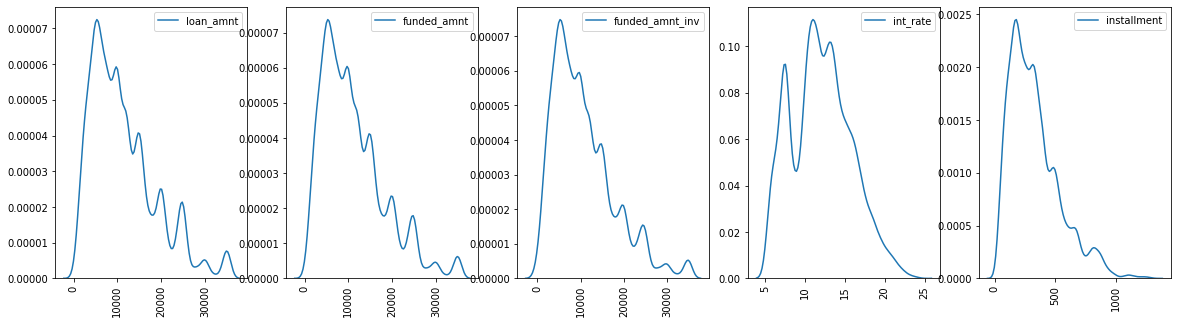

In [189]:
plt.figure(figsize=(20,5))
for i in range(0,5):
    plt.subplot(1,5,i+1)
    plt.xticks(rotation=90)
    sns.kdeplot(lend_clean2[lending.columns[i]])

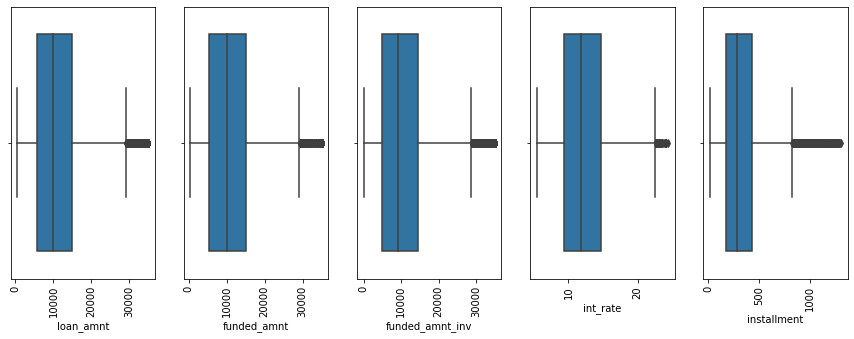

In [190]:
plt.figure(figsize=(15,5))
for i in range(0,5):
    plt.subplot(1,5,i+1)
    plt.xticks(rotation=90)
    sns.boxplot(lend_clean2[lending.columns[i]])

In [191]:
#next 5 countinous variable
lend_clean2.describe().iloc[:,5:10]

,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc
count,3.643100e+04,36431.000000,36431.000000,36431.000000,36431.000000
mean,6.930694e+04,13.444293,0.146139,0.864840,9.351679
std,6.354376e+04,6.643417,0.492211,1.063383,4.373724
min,4.000000e+03,0.000000,0.000000,0.000000,2.000000
25%,4.200000e+04,8.360000,0.000000,0.000000,6.000000
50%,6.000000e+04,13.540000,0.000000,1.000000,9.000000
75%,8.300000e+04,18.690000,0.000000,1.000000,12.000000
max,6.000000e+06,29.990000,11.000000,8.000000,44.000000


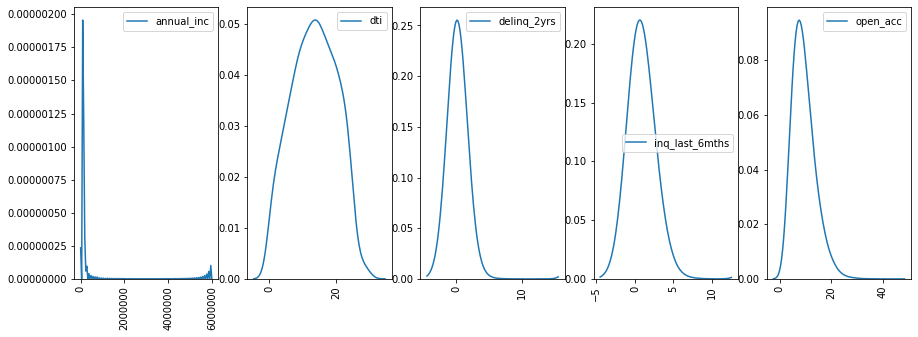

In [133]:
plt.figure(figsize=(15,5))
for i in range(5,10):
    plt.subplot(1,5,i-4)
    plt.xticks(rotation=90)
    sns.kdeplot(lend_clean2[lending.columns[i]],bw=1.5)


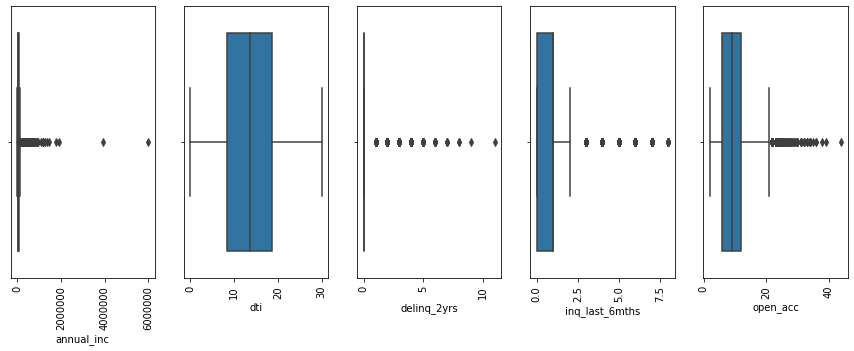

In [134]:
plt.figure(figsize=(15,5))
for i in range(5,10):
    plt.subplot(1,5,i-4)
    plt.xticks(rotation=90)
    sns.boxplot(lend_clean2[lending.columns[i]])

In [192]:
#for better understanding creating new variable based on data type deling_2yrs_flag. 
#0: No deliquency & 1: Deliquency
lend_clean2['delinq_2yrs_flag']=lend_clean2['delinq_2yrs'].apply(lambda x:"1" if x>0 else "0")

In [193]:
#as the distribution of annual income is highly skewed & uneven so converting to categorical
lend_clean2['annual_inc'].quantile([0.25,0.5,0.75])
lend_clean2['annual_inc_flag']=lend_clean2['annual_inc'].apply(lambda x:"0" if x<=42000 else("1" if(x<=8300 and x>42000)else "2"))

In [40]:
lend_clean2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,delinq_2yrs_flag,annual_inc_flag
0,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,435.17,0.00,117.08,1.11,13-Apr,119.66,13-Sep,0.0,0,0
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,2214.92,16.97,0.00,0.00,15-Jan,357.48,16-Apr,0.0,0,2
2,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,1037.39,0.00,0.00,0.00,16-May,67.79,16-May,0.0,0,2
3,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,632.21,0.00,0.00,0.00,15-Jan,161.03,16-Jan,0.0,0,0
4,7000,7000,7000.0,60 months,15.96,170.08,C,C5,8 years,RENT,...,3125.23,0.00,0.00,0.00,16-May,1313.76,16-May,0.0,0,2


In [194]:
#next 5 continous variable
lend_clean2.describe().iloc[:,10:15]

,pub_rec,revol_bal,revol_util,total_acc,out_prncp
count,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000
mean,0.053663,13466.188740,49.276069,22.246137,52.468572
std,0.234897,15702.347369,28.192248,11.376630,379.861072
min,0.000000,0.000000,0.000000,2.000000,0.000000
25%,0.000000,3832.000000,26.100000,14.000000,0.000000
50%,0.000000,9031.000000,49.900000,21.000000,0.000000
75%,0.000000,17231.500000,72.700000,29.000000,0.000000
max,4.000000,149588.000000,99.900000,90.000000,6311.470000


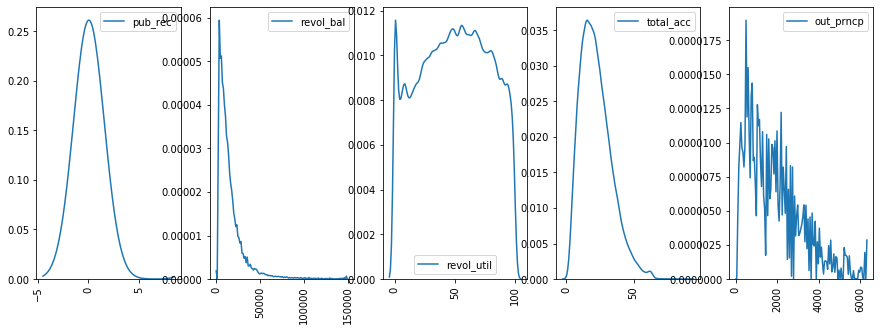

In [195]:
plt.figure(figsize=(15,5))
for i in range(10,15):
    plt.subplot(1,5,i-9)
    plt.xticks(rotation=90)
    sns.kdeplot(lend_clean2[lending.columns[i]],bw=1.5)

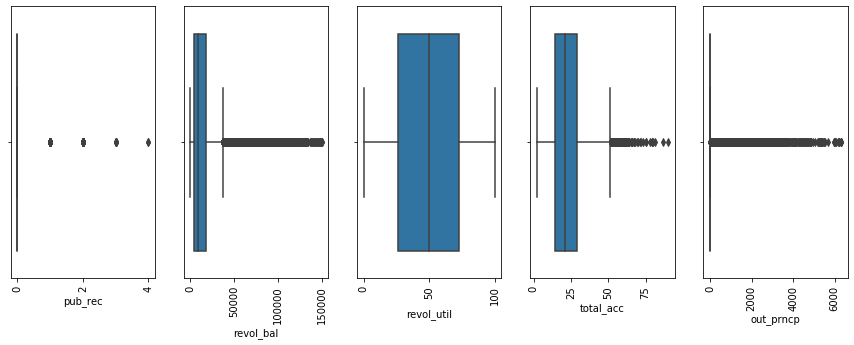

In [196]:
plt.figure(figsize=(15,5))
for i in range(10,15):
    plt.subplot(1,5,i-9)
    plt.xticks(rotation=90)
    sns.boxplot(lend_clean2[lending.columns[i]])

In [197]:
#for better understanding creating new variable based on datatype of pub_rec_flag
#0 : clean,1:risky
lend_clean2['pub_rec_flag']=lend_clean2['pub_rec'].apply(lambda x:"1" if x>0 else "0")

In [198]:
#for better understanding creating new variable based on Data type out_prancp
#0 : No, 1 :yes
lend_clean2['out_prncp_flag']=lend_clean2['out_prncp'].apply(lambda x:"1" if x>0 else "0")

In [199]:
#next 5 continous variable
lend_clean2.describe().iloc[:,15:20]

,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
count,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000
mean,52.216180,12311.226392,11841.691116,9912.631803,2304.442520
std,378.454016,9048.552965,8911.170172,7053.310578,2629.598904
min,0.000000,33.730000,0.000000,0.000000,6.220000
25%,0.000000,5672.634184,5413.880000,4800.000000,678.030000
50%,0.000000,10101.589360,9632.410000,8123.600000,1379.820000
75%,0.000000,16700.865405,16094.780000,14000.000000,2891.865000
max,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000


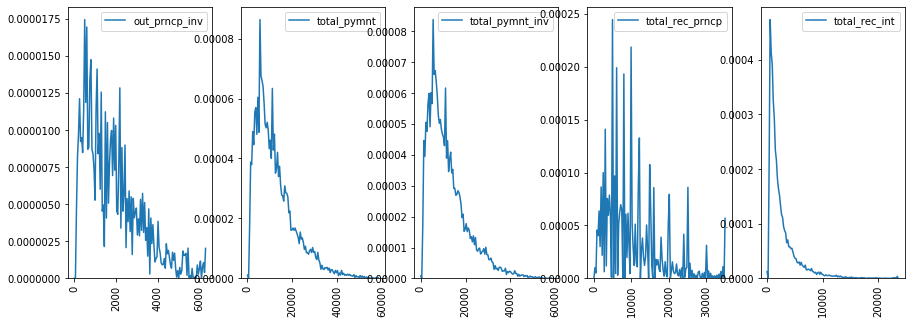

In [200]:
plt.figure(figsize=(15,5))
for i in range(15,20):
    plt.subplot(1,5,i-14)
    plt.xticks(rotation=90)
    sns.kdeplot(lend_clean2[lending.columns[i]],bw=1.5)

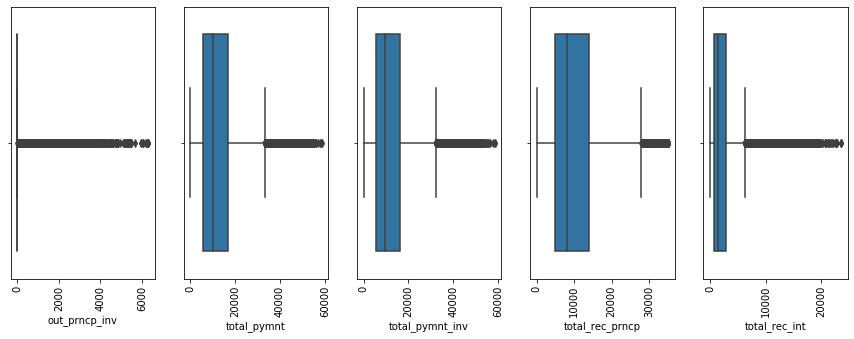

In [201]:
plt.figure(figsize=(15,5))
for i in range(15,20):
    plt.subplot(1,5,i-14)
    plt.xticks(rotation=90)
    sns.boxplot(lend_clean2[lending.columns[i]])

In [202]:
lend_clean2['out_prncp_inv_flag']=lend_clean2['out_prncp_inv'].apply(lambda x: "1" if x>0 else "0")

In [203]:
#last 5 variables
lend_clean2.describe().iloc[:,20:25]

,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000
mean,1.299912,92.852238,11.677622,2743.075381,0.041366
std,7.065817,682.064837,140.884174,4473.621163,0.200100
min,0.000000,0.000000,0.000000,0.010000,0.000000
25%,0.000000,0.000000,0.000000,226.310000,0.000000
50%,0.000000,0.000000,0.000000,571.700000,0.000000
75%,0.000000,0.000000,0.000000,3457.620000,0.000000
max,180.200000,29623.350000,7002.190000,36115.200000,2.000000


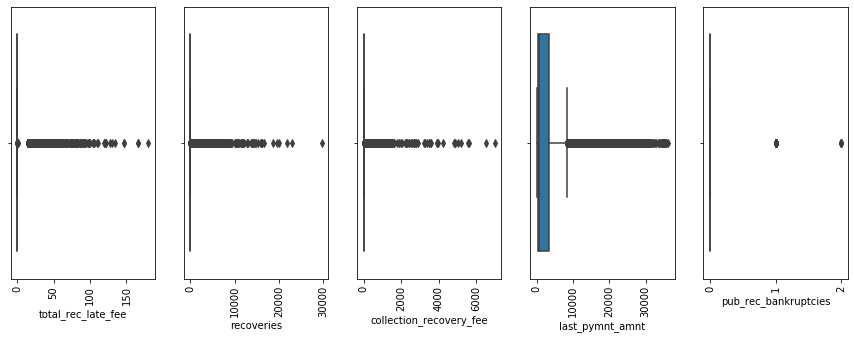

In [204]:
plt.figure(figsize=(15,5))
for i in range(20,25):
    plt.subplot(1,5,i-19)
    plt.xticks(rotation=90)
    sns.boxplot(lend_clean2[lending.columns[i]])

In [205]:
lend_clean2['total_rec_late_fee_flag']=lend_clean2['total_rec_late_fee'].apply(lambda x:"1" if x>0 else "0")
lend_clean2['recoveries_flag']=lend_clean2['recoveries'].apply(lambda x:"1" if x>0 else "0")
lend_clean2['collection_recovery_fee_flag']=lend_clean2['collection_recovery_fee'].apply(lambda x:"1" if x>0 else "0")
lend_clean2['pub_rec_bankruptcies_flag']=lend_clean2['pub_rec_bankruptcies'].apply(lambda x:"1" if x>0 else "0")

In [206]:
lend_clean2.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
loan_amnt,1.000000,0.981388,0.953247,0.308209,0.928915,0.261315,0.067403,-0.035005,0.006823,0.173863,...,0.192881,0.888887,0.866102,0.854813,0.730418,0.044322,0.136144,0.075101,0.451001,-0.031561
funded_amnt,0.981388,1.000000,0.972773,0.312507,0.954986,0.257179,0.067843,-0.035744,0.007166,0.172338,...,0.195159,0.905752,0.883680,0.873309,0.738708,0.046079,0.136635,0.076809,0.455494,-0.033192
funded_amnt_inv,0.953247,0.972773,1.000000,0.304517,0.921844,0.248364,0.071215,-0.039734,-0.002872,0.162616,...,0.202984,0.892843,0.913117,0.858757,0.735545,0.032999,0.128201,0.066378,0.445489,-0.038262
int_rate,0.308209,0.312507,0.304517,1.000000,0.281933,0.051562,0.111024,0.158297,0.134919,0.014186,...,0.134722,0.311227,0.304549,0.188680,0.532213,0.097046,0.124835,0.071284,0.160972,0.082400
installment,0.928915,0.954986,0.921844,0.281933,1.000000,0.259519,0.056758,-0.023580,0.007247,0.170380,...,0.125747,0.858998,0.832667,0.853784,0.635133,0.054395,0.117511,0.076804,0.402433,-0.029280
annual_inc,0.261315,0.257179,0.248364,0.051562,0.259519,1.000000,-0.122186,0.023628,0.032117,0.156152,...,0.033750,0.249365,0.241466,0.250238,0.181088,0.006522,0.022219,0.016938,0.135591,-0.011366
dti,0.067403,0.067843,0.071215,0.111024,0.056758,-0.122186,1.000000,-0.036946,0.002802,0.290648,...,0.036373,0.065044,0.068080,0.041604,0.105857,-0.009463,0.024647,0.010754,0.004599,0.005925
delinq_2yrs,-0.035005,-0.035744,-0.039734,0.158297,-0.023580,0.023628,-0.036946,1.000000,0.007321,0.011114,...,-0.003659,-0.025122,-0.029537,-0.041279,0.021106,0.029698,0.011913,0.014572,-0.012072,0.005788
inq_last_6mths,0.006823,0.007166,-0.002872,0.134919,0.007247,0.032117,0.002802,0.007321,1.000000,0.092111,...,-0.009203,-0.010275,-0.017428,-0.023374,0.022370,0.031652,0.018831,0.013752,0.029955,0.015182
open_acc,0.173863,0.172338,0.162616,0.014186,0.170380,0.156152,0.290648,0.011114,0.092111,1.000000,...,0.028683,0.158709,0.151133,0.156473,0.121389,-0.016457,0.019563,0.010974,0.078756,0.010696


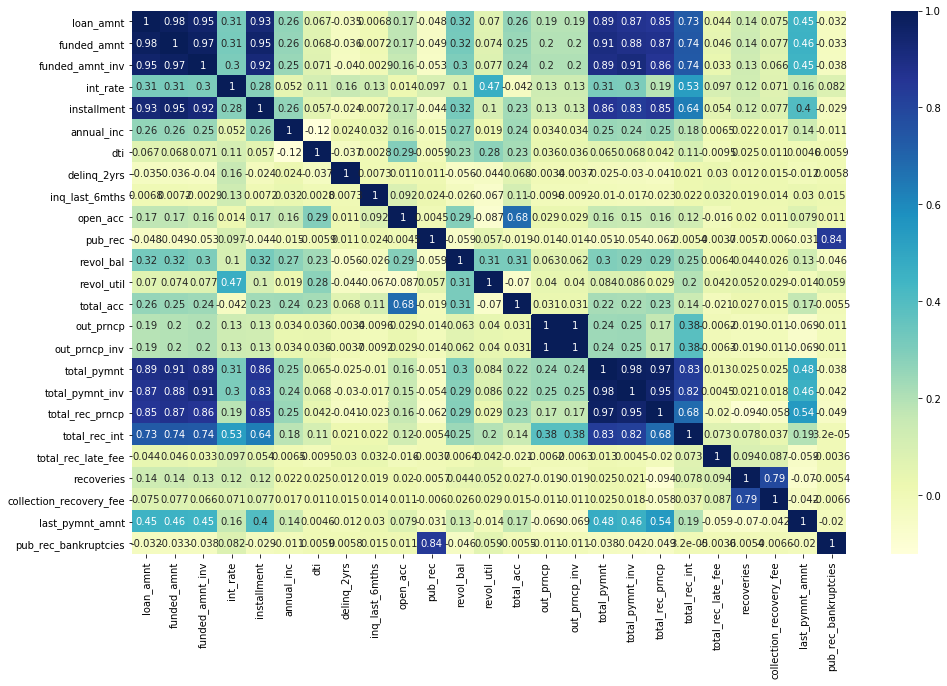

In [56]:
plt.figure(figsize=(16,10))
sns.heatmap(lend_clean2.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Uni-variate analysis for categorical variable

In [207]:
lend_cat=lend_clean2.drop(lending.columns,axis=1)
print(lend_cat.columns)

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d',
       'delinq_2yrs_flag', 'annual_inc_flag', 'pub_rec_flag', 'out_prncp_flag',
       'out_prncp_inv_flag', 'total_rec_late_fee_flag', 'recoveries_flag',
       'collection_recovery_fee_flag', 'pub_rec_bankruptcies_flag'],
      dtype='object')


In [208]:
lend_cat.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,zip_code,...,last_credit_pull_d,delinq_2yrs_flag,annual_inc_flag,pub_rec_flag,out_prncp_flag,out_prncp_inv_flag,total_rec_late_fee_flag,recoveries_flag,collection_recovery_fee_flag,pub_rec_bankruptcies_flag
0,60 months,C,C4,< 1 year,RENT,Source Verified,11-Dec,Charged Off,car,309xx,...,13-Sep,0,0,0,0,0,0,1,1,0
1,36 months,C,C1,10+ years,RENT,Source Verified,11-Dec,Fully Paid,other,917xx,...,16-Apr,0,2,0,0,0,1,0,0,0
2,60 months,B,B5,1 year,RENT,Source Verified,11-Dec,Current,other,972xx,...,16-May,0,2,0,1,1,0,0,0,0
3,36 months,A,A4,3 years,RENT,Source Verified,11-Dec,Fully Paid,wedding,852xx,...,16-Jan,0,0,0,0,0,0,0,0,0
4,60 months,C,C5,8 years,RENT,Not Verified,11-Dec,Fully Paid,debt_consolidation,280xx,...,16-May,0,2,0,0,0,0,0,0,0


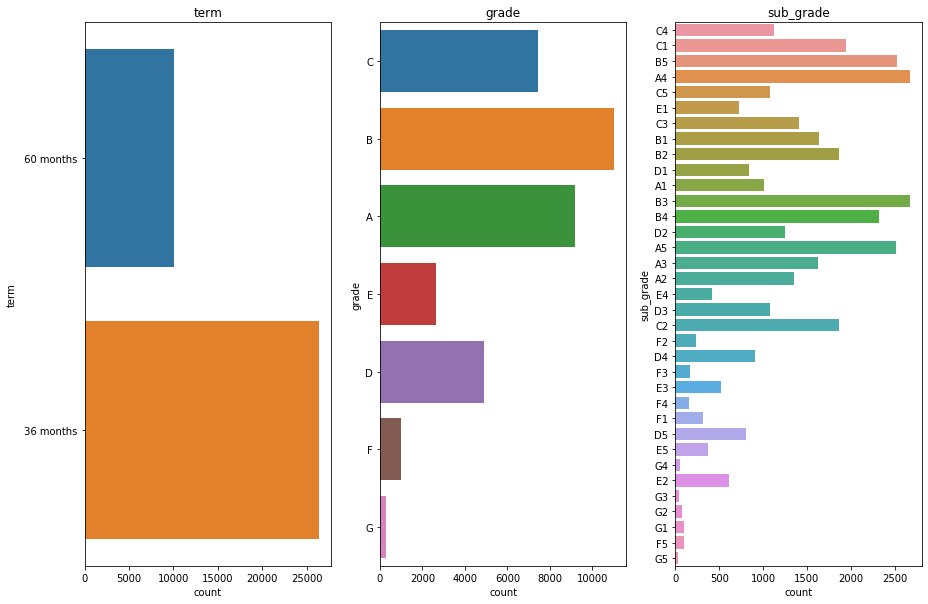

In [209]:
plt.figure(figsize=(15,10))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    plt.title(lend_cat.columns[i])
    sns.countplot(y=lend_cat.columns[i],data=lend_cat)

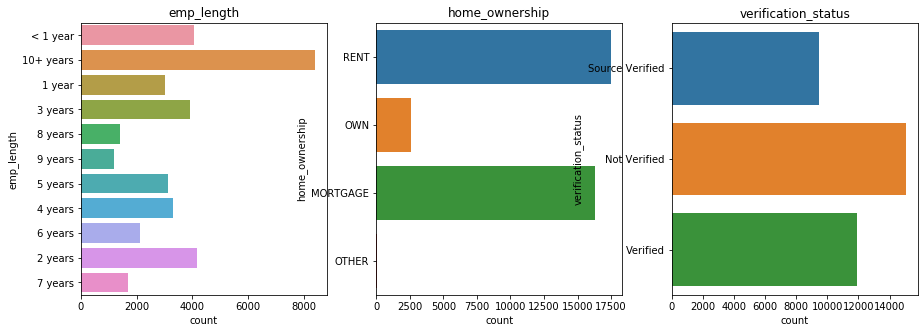

In [210]:
plt.figure(figsize=(15,5))
for i in range(3,6):
    plt.subplot(1,3,i-2)
    plt.title(lend_cat.columns[i])
    sns.countplot(y=lend_cat.columns[i],data=lend_cat)

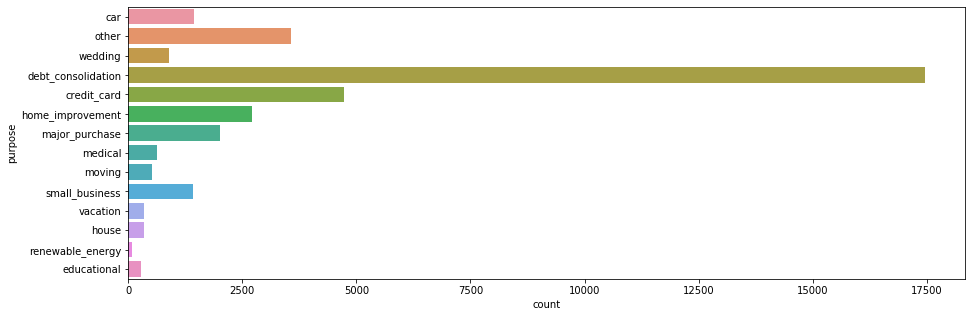

In [154]:
plt.figure(figsize=(15,5))
sns.countplot(y=lend_cat.purpose,data=lend_cat)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text xticklabel objects>)

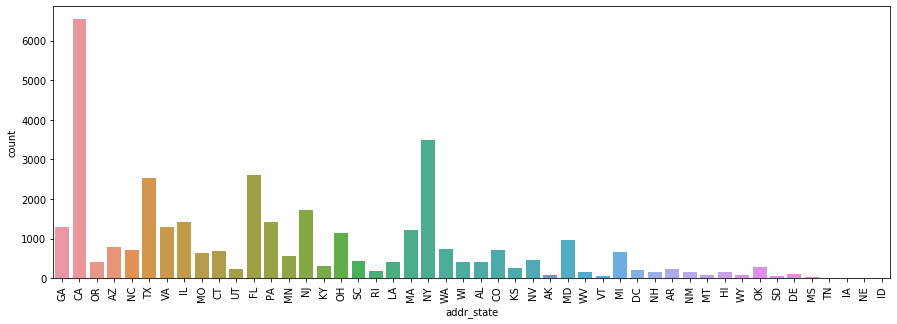

In [211]:
plt.figure(figsize=(15,5))
sns.countplot(x=lend_cat.addr_state,data=lend_cat)
plt.xticks(rotation=90)

In [212]:
print(lend_clean2.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'delinq_2yrs_flag', 'annual_inc_flag',
       'pub_rec_flag', 'out_prncp_flag', 'out_prncp_inv_flag',
       'total_rec_late_fee_flag', 'recoveries_flag',
       'collection_recovery_fee_flag', 'pub_rec_bankruptcies_flag'],
      dtype='object')


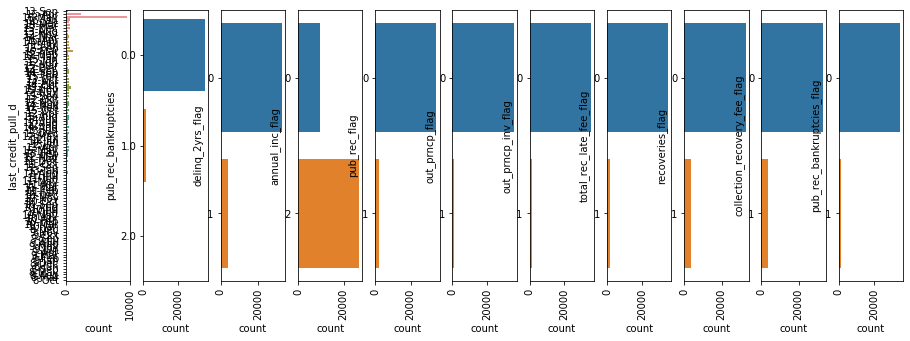

In [213]:
#plotting new categorical variables columns derived from continous variables
plt.figure(figsize=(15,5))
for i in range(37,48):
    plt.subplot(1,11,i-36)
    sns.countplot(y=lend_clean2.columns[i],data=lend_clean2)
    plt.xticks(rotation=90)

### Bivariate Analysis with Loan status

In [214]:
#converting to status 0 & 1
lend_clean2['loan_status_cat']=lend_clean2['loan_status']
lend_clean2=lend_clean2.drop(["loan_status"],axis=1)
lend_clean2['loan_status']=lend_clean2['loan_status_cat'].apply(lambda x:"1" if x=="Charged Off" else "0")

### continous variables

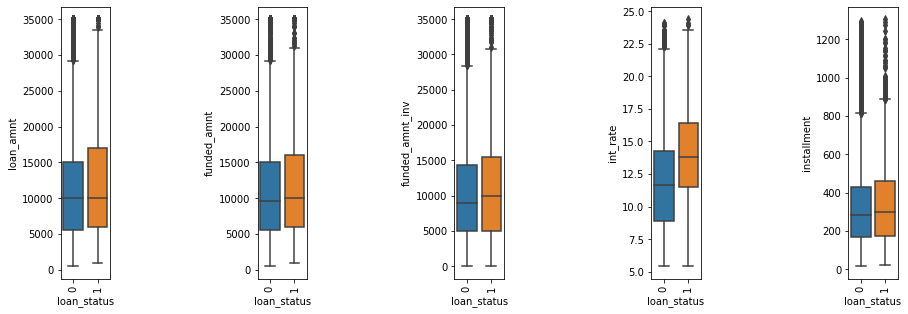

In [215]:
plt.figure(figsize=(15,5))
for i in range(0,5):
    plt.subplot(1,5,i+1)
    sns.boxplot(y=lend_clean2[lending.columns[i]],x=lend_clean2['loan_status'],data=lend_clean2)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=3,hspace=None)

- from the above figure it was found that Int_rate & installment have higher impact on Loan status
- Loan amnt, Funded amnt_inv have high correlation

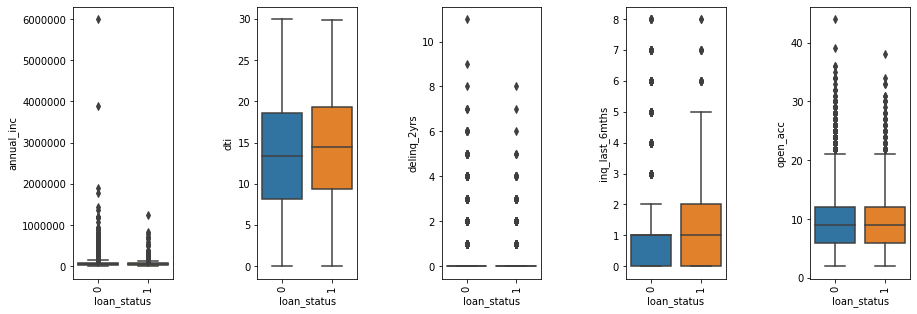

In [216]:
plt.figure(figsize=(15,5))
for i in range(5,10):
    plt.subplot(1,5,i-4)
    sns.boxplot(y=lend_clean2[lending.columns[i]],x=lend_clean2['loan_status'],data=lend_clean2)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.85,hspace=None)

- from the above figure it was found that dti and inq_las_6month have higher impact on Loan status.
- for annual income, delinq_2years we have created bins & will be covered by categorical analysis

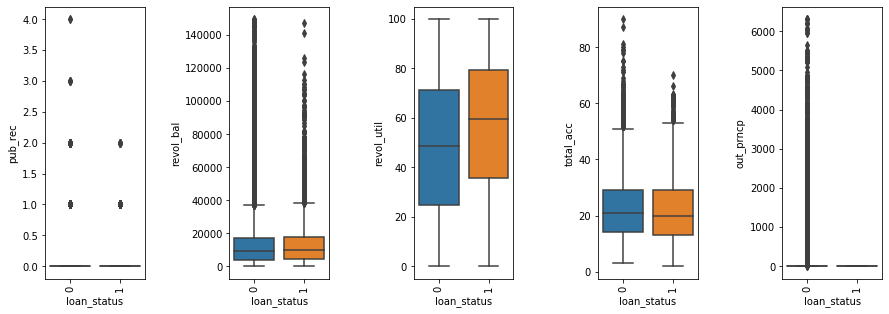

In [217]:
plt.figure(figsize=(15,5))
for i in range(10,15):
    plt.subplot(1,5,i-9)
    sns.boxplot(y=lend_clean2[lending.columns[i]],x=lend_clean2['loan_status'],data=lend_clean2)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.85,hspace=None)

- from the above fig it was found that revol_util has higher impact on Loan Status

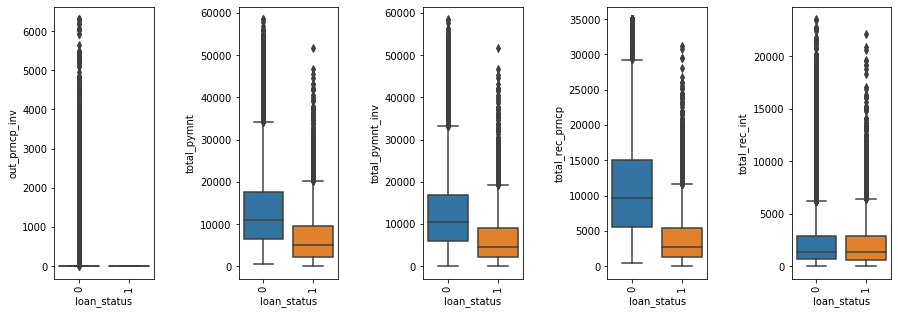

In [218]:
plt.figure(figsize=(15,5))
for i in range(15,20):
    plt.subplot(1,5,i-14)
    sns.boxplot(y=lend_clean2[lending.columns[i]],x=lend_clean2['loan_status'],data=lend_clean2)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.85,hspace=None)

- from the above figure it was found that Total payment and Total_rec_princ have higher impact on Loan status
- as both details we can obtain post loan disbursment we are not considering in Top 5

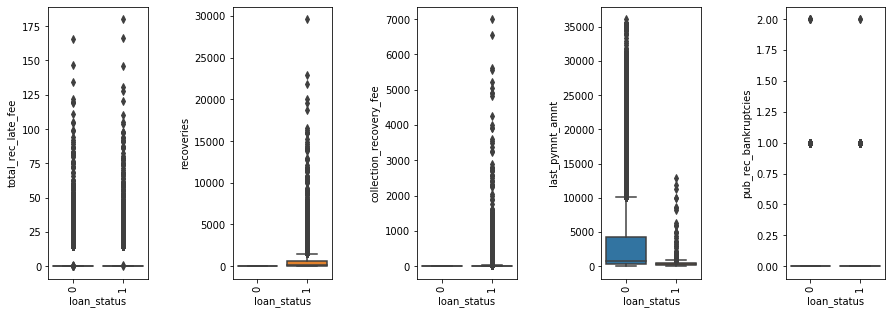

In [219]:
plt.figure(figsize=(15,5))
for i in range(20,25):
    plt.subplot(1,5,i-19)
    sns.boxplot(y=lend_clean2[lending.columns[i]],x=lend_clean2['loan_status'],data=lend_clean2)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.85,hspace=None)

- from the above figure it was found that recoveries and last payment amnt have higher impact on Loan status
- as both details we can obtain post loan disbursment we are not considering in Top 5

In [40]:
#categorical new flag variables

In [220]:
from scipy.stats import chi2_contingency
print(chi2_contingency(pd.crosstab(lend_clean2.delinq_2yrs_flag,lend_clean2.loan_status)))
pd.crosstab(lend_clean2.delinq_2yrs_flag,lend_clean2.loan_status).apply(lambda r:r/r.sum(),axis=1)

(6.571597101425523, 0.01036189251830996, 1, array([[28077.42515989,  4406.57484011],
       [ 3411.57484011,   535.42515989]]))


loan_status,0,1
delinq_2yrs_flag,,
0,0.865965,0.134035
1,0.851026,0.148974


- from the above matrix it was found that Total delinq_2yrs & Loan status are dependent, but the % change is less, Not considering

In [221]:
print(pd.crosstab(lend_clean2.out_prncp_flag,lend_clean2.loan_status))
print(chi2_contingency(pd.crosstab(lend_clean2.out_prncp_flag,lend_clean2.loan_status)))
pd.crosstab(lend_clean2.out_prncp_flag,lend_clean2.loan_status).apply(lambda r:r/r.sum(),axis=1)

loan_status         0     1
out_prncp_flag             
0               30423  4942
1                1066     0
(171.15517119904672, 4.1387620150175713e-39, 1, array([[30567.60684582,  4797.39315418],
       [  921.39315418,   144.60684582]]))


loan_status,0,1
out_prncp_flag,,
0,0.860257,0.139743
1,1.000000,0.000000


- from the above matrix it was found that Total out_prncp_flag & Loan status are dependant, but due to post disbursment property we are not considering in top 5

In [223]:
print(pd.crosstab(lend_clean2.total_rec_late_fee_flag,lend_clean2.loan_status))
print(chi2_contingency(pd.crosstab(lend_clean2.total_rec_late_fee_flag,lend_clean2.loan_status)))
pd.crosstab(lend_clean2.total_rec_late_fee_flag,lend_clean2.loan_status).apply(lambda r:r/r.sum(),axis=1)

loan_status                  0     1
total_rec_late_fee_flag             
0                        30427  4189
1                         1062   753
(1267.635332774832, 1.2206352843124916e-277, 1, array([[29920.21146826,  4695.78853174],
       [ 1568.78853174,   246.21146826]]))


loan_status,0,1
total_rec_late_fee_flag,,
0,0.878987,0.121013
1,0.585124,0.414876


- from the above matrix it was found that Total_rec_late_fee_flag & Loan status are dependant, but due to post disbursment property we are not considering in top 5

In [224]:
print(pd.crosstab(lend_clean2.recoveries_flag,lend_clean2.loan_status))
print(chi2_contingency(pd.crosstab(lend_clean2.recoveries_flag,lend_clean2.loan_status)))
pd.crosstab(lend_clean2.recoveries_flag,lend_clean2.loan_status).apply(lambda r:r/r.sum(),axis=1)

loan_status          0     1
recoveries_flag             
0                31489  1215
1                    0  3727
(26445.447097234708, 0.0, 1, array([[28267.58134556,  4436.41865444],
       [ 3221.41865444,   505.58134556]]))


loan_status,0,1
recoveries_flag,,
0,0.962849,0.037151
1,0.000000,1.000000


- from the above matrix it was found that recoveries_flag & Loan status are dependant, but due to post disbursment property we are not considering in top 5

In [225]:
print(pd.crosstab(lend_clean2.collection_recovery_fee_flag,lend_clean2.loan_status))
print(chi2_contingency(pd.crosstab(lend_clean2.collection_recovery_fee_flag,lend_clean2.loan_status)))
pd.crosstab(lend_clean2.collection_recovery_fee_flag,lend_clean2.loan_status).apply(lambda r:r/r.sum(),axis=1)

loan_status                       0     1
collection_recovery_fee_flag             
0                             31489  1610
1                                 0  3332
(23359.660703923815, 0.0, 1, array([[28608.99813346,  4490.00186654],
       [ 2880.00186654,   451.99813346]]))


loan_status,0,1
collection_recovery_fee_flag,,
0,0.951358,0.048642
1,0.000000,1.000000


- from the above matrix it was found that recoveries_flag & Loan status are dependant, but due to post disbursment property we are not considering in top 5

(69.19158742582417, 8.934834430395601e-17, 1, array([[30192.48055228,  4738.51944772],
       [ 1296.51944772,   203.48055228]]))


<Figure size 1080x360 with 0 Axes>

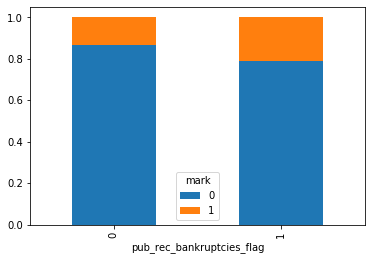

In [226]:
plt.figure(figsize=(15,5))
print(chi2_contingency(pd.crosstab(lend_clean2.pub_rec_bankruptcies_flag,lend_clean2.loan_status)))
ct=pd.crosstab(lend_clean2.pub_rec_bankruptcies_flag,lend_clean2.loan_status).apply(lambda r:r/r.sum(),axis=1)
ct.plot.bar(stacked=True)
plt.legend(title='mark')
plt.show()

- from the above matrix it was found that **pub_rec_bankruptcies_flag** & Loan status are dependant, **considering** in top 5

loan_status      0     1
term                    
 36 months   23646  2729
 60 months    7843  2213
(843.1422079227771, 2.2514997020326636e-185, 1, array([[22797.13362246,  3577.86637754],
       [ 8691.86637754,  1364.13362246]]))


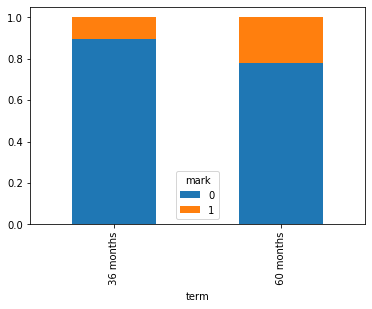

In [227]:
print(pd.crosstab(lend_clean2.term,lend_clean2.loan_status))
print(chi2_contingency(pd.crosstab(lend_clean2.term,lend_clean2.loan_status)))
ct=pd.crosstab(lend_clean2.term,lend_clean2.loan_status).apply(lambda r:r/r.sum(),axis=1)
ct.plot.bar(stacked=True)
plt.legend(title='mark')
plt.show()

- from the above matrix it was found that **term** & Loan status are dependant, **considering** in top 5

loan_status     0     1
grade                  
A            8662   513
B            9782  1253
C            6261  1169
D            3894   980
E            2002   648
F             683   286
G             205    93
(1308.4579071814187, 1.5985739448609166e-279, 6, array([[7930.37728857, 1244.62271143],
       [9538.06140375, 1496.93859625],
       [6422.09299772, 1007.90700228],
       [4212.8238588 ,  661.1761412 ],
       [2290.51769098,  359.48230902],
       [ 837.55156323,  131.44843677],
       [ 257.57519695,   40.42480305]]))


<Figure size 1080x360 with 0 Axes>

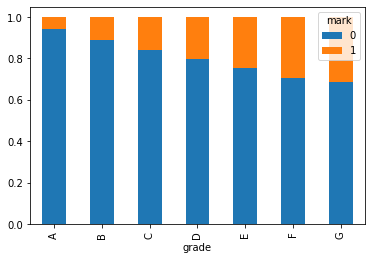

In [228]:
plt.figure(figsize=(15,5))
print(pd.crosstab(lend_clean2.grade,lend_clean2.loan_status))
print(chi2_contingency(pd.crosstab(lend_clean2.grade,lend_clean2.loan_status)))
ct=pd.crosstab(lend_clean2.grade,lend_clean2.loan_status).apply(lambda r:r/r.sum(),axis=1)
ct.plot.bar(stacked=True)
plt.legend(title='mark')
plt.show()

- from the above matrix it was found that **grade** & Loan status are dependant, **considering** in top 5

In [229]:
print(chi2_contingency(pd.crosstab(lend_clean2.sub_grade,lend_clean2.loan_status)))
pd.crosstab(lend_clean2.sub_grade,lend_clean2.loan_status).apply(lambda r:r/r.sum(),axis=1)

(1417.043985270614, 3.87032453166905e-276, 34, array([[ 868.66802997,  136.33197003],
       [1172.05358074,  183.94641926],
       [1408.88446653,  221.11553347],
       [2310.39765584,  362.60234416],
       [2170.37355549,  340.62644451],
       [1420.12096841,  222.87903159],
       [1616.32757816,  253.67242184],
       [2311.26200214,  362.73799786],
       [2004.41906618,  314.58093382],
       [2185.93178886,  343.06821114],
       [1684.61093574,  264.38906426],
       [1616.32757816,  253.67242184],
       [1215.27089567,  190.72910433],
       [ 970.6608932 ,  152.3391068 ],
       [ 935.22269496,  146.77730504],
       [ 730.37262222,  114.62737778],
       [1076.11114161,  168.88885839],
       [ 931.76530976,  146.23469024],
       [ 782.23340013,  122.76659987],
       [ 692.34138508,  108.65861492],
       [ 630.10845159,   98.89154841],
       [ 523.79385688,   82.20614312],
       [ 446.00269002,   69.99730998],
       [ 365.61848426,   57.38151574],
       [ 324.9942

loan_status,0,1
sub_grade,,
A1,0.977114,0.022886
A2,0.953540,0.046460
A3,0.950920,0.049080
A4,0.940890,0.059110
A5,0.924731,0.075269
B1,0.914181,0.085819
B2,0.897861,0.102139
B3,0.885191,0.114809
B4,0.877965,0.122035


- from the above matrix it was found that **sub grade** & Loan status are dependant, but due to presence of grades **not considering** in top 5

In [230]:
print(chi2_contingency(pd.crosstab(lend_clean2.emp_length,lend_clean2.loan_status)))
pd.crosstab(lend_clean2.emp_length,lend_clean2.loan_status).apply(lambda r:r/r.sum(),axis=1)

(17.414811680629022, 0.06567454717999019, 10, array([[2615.51189921,  410.48810079],
       [7266.55933134, 1140.44066866],
       [3609.51014246,  566.48985754],
       [3383.05141226,  530.94858774],
       [2849.7497461 ,  447.2502539 ],
       [2704.53956795,  424.46043205],
       [1833.27849908,  287.72150092],
       [1466.79566852,  230.20433148],
       [1214.40654937,  190.59345063],
       [1043.26598227,  163.73401773],
       [3502.33120145,  549.66879855]]))


loan_status,0,1
emp_length,,
1 year,0.865169,0.134831
10+ years,0.853337,0.146663
2 years,0.873563,0.126437
3 years,0.866888,0.133112
4 years,0.870488,0.129512
5 years,0.865133,0.134867
6 years,0.864686,0.135314
7 years,0.853860,0.146140
8 years,0.864057,0.135943


- from the above matrix it was found **emp_length** & Loan status are **independent**, not considering for top 5

In [231]:
print(chi2_contingency(pd.crosstab(lend_clean2.home_ownership,lend_clean2.loan_status)))
pd.crosstab(lend_clean2.home_ownership,lend_clean2.loan_status).apply(lambda r:r/r.sum(),axis=1)

(24.980385438160972, 1.55869935866093e-05, 3, array([[1.40871160e+04, 2.21088403e+03],
       [8.12485521e+01, 1.27514479e+01],
       [2.22569172e+03, 3.49308281e+02],
       [1.50949438e+04, 2.36905624e+03]]))


loan_status,0,1
home_ownership,,
MORTGAGE,0.873543,0.126457
OTHER,0.808511,0.191489
OWN,0.865631,0.134369
RENT,0.855875,0.144125


- from the above matrix it was found **home_ownership** & Loan status are **independent**, not considering for top 5

In [232]:
print(chi2_contingency(pd.crosstab(lend_clean2.verification_status,lend_clean2.loan_status)))
pd.crosstab(lend_clean2.verification_status,lend_clean2.loan_status).apply(lambda r:r/r.sum(),axis=1)

(82.59167321323606, 1.1626420764059871e-18, 2, array([[13011.86917735,  2042.13082265],
       [ 8168.93686695,  1282.06313305],
       [10308.1939557 ,  1617.8060443 ]]))


loan_status,0,1
verification_status,,
Not Verified,0.882490,0.117510
Source Verified,0.860121,0.139879
Verified,0.844793,0.155207


- from the above matrix it was found **home_ownership** & Loan status are **independent**, not considering for top 5

(304.8327562611808, 2.342690296810268e-57, 13, array([[1.24725171e+03, 1.95748291e+02],
       [4.08490061e+03, 6.41099393e+02],
       [1.50984011e+04, 2.36959886e+03],
       [2.38559578e+02, 3.74404216e+01],
       [2.33805674e+03, 3.66943263e+02],
       [2.96470780e+02, 4.65292196e+01],
       [1.73560737e+03, 2.72392633e+02],
       [5.47995553e+02, 8.60044468e+01],
       [4.57239192e+02, 7.17608081e+01],
       [3.09003802e+03, 4.84961983e+02],
       [7.60624743e+01, 1.19375257e+01],
       [1.22218567e+03, 1.91814334e+02],
       [2.90420356e+02, 4.55796437e+01],
       [7.65810820e+02, 1.20189180e+02]]))


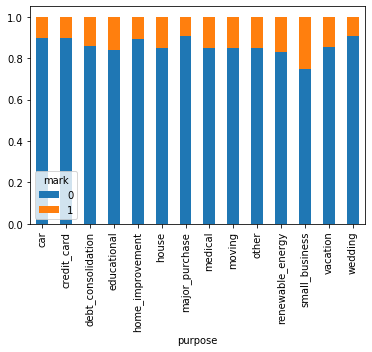

In [233]:
print(chi2_contingency(pd.crosstab(lend_clean2.purpose,lend_clean2.loan_status)))
ct=pd.crosstab(lend_clean2.purpose,lend_clean2.loan_status).apply(lambda r:r/r.sum(),axis=1)
ct.plot.bar(stacked=True)
plt.legend(title='mark')
plt.show()

- from the above matrix it was found **purpose** & Loan status are **dependent**,considering for top 5

loan_status     0    1
addr_state            
AK             60   15
AL            366   47
AR            200   25
AZ            677  106
CA           5560  976
CO            627   80
CT            600   78
DC            192   14
DE             95   11
FL           2179  437
GA           1097  194
HI            135   26
IA              1    0
ID              3    0
IL           1239  187
KS            225   24
KY            263   43
LA            353   45
MA           1083  139
MD            834  140
MI            567   89
MN            491   72
MO            529   95
MS             17    1
MT             64    9
NC            606   98
NE              1    0
NH            129   22
NJ           1467  256
NM            139   28
NV            363   97
NY           3056  438
OH           1000  138
OK            246   37
OR            349   63
PA           1257  160
RI            164   25
SC            375   60
SD             47   10
TN              8    2
TX           2243  273
UT         

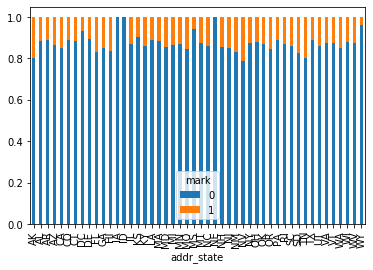

In [235]:
print(pd.crosstab(lend_clean2.addr_state,lend_clean2.loan_status))
print(chi2_contingency(pd.crosstab(lend_clean2.addr_state,lend_clean2.loan_status)))
ct=pd.crosstab(lend_clean2.addr_state,lend_clean2.loan_status).apply(lambda r:r/r.sum(),axis=1)
ct.plot.bar(stacked=True)
plt.legend(title='mark')
plt.show()

- from the above matrix it was found **addr_state** & Loan status are **dependent**,considering for top 5

In [236]:
print(chi2_contingency(pd.crosstab(lend_clean2.zip_code,lend_clean2.loan_status)))
pd.crosstab(lend_clean2.zip_code,lend_clean2.loan_status).apply(lambda r: r/r.sum(),axis=1)

(1028.8437154463566, 1.156491153800867e-07, 804, array([[ 0.8643463 ,  0.1356537 ],
       [77.79116686, 12.20883314],
       [12.10084818,  1.89915182],
       ...,
       [18.15127227,  2.84872773],
       [ 8.64346298,  1.35653702],
       [ 0.8643463 ,  0.1356537 ]]))


loan_status,0,1
zip_code,,
007xx,1.000000,0.000000
010xx,0.855556,0.144444
011xx,0.928571,0.071429
012xx,0.928571,0.071429
013xx,0.785714,0.214286
...,...,...
995xx,0.843750,0.156250
996xx,0.777778,0.222222
997xx,0.714286,0.285714


- **not considering** as full info is nor available

In [62]:
#issued date/month analysis

In [237]:
lend_clean2.issue_d_mnth=lend_clean2.issue_d.apply(lambda x:x[-3:])
print(chi2_contingency(pd.crosstab(lend_clean2.issue_d_mnth,lend_clean2.loan_status)))
pd.crosstab(lend_clean2.issue_d_mnth,lend_clean2.loan_status).apply(lambda r:r/r.sum(),axis=1)

(36.44669576199103, 0.00014258955019403948, 11, array([[2309.53330954,  362.46669046],
       [2855.80017018,  448.19982982],
       [3482.45123658,  546.54876342],
       [1745.97952293,  274.02047707],
       [1770.18121929,  277.81878071],
       [2793.56723669,  438.43276331],
       [2652.67879004,  416.32120996],
       [2070.97373116,  325.02626884],
       [2438.32090802,  382.67909198],
       [3303.5315528 ,  518.4684472 ],
       [3109.05363564,  487.94636436],
       [2956.92868711,  464.07131289]]))


C:\Users\LASNA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


loan_status,0,1
issue_d,,
Apr,0.872380,0.127620
Aug,0.870763,0.129237
Dec,0.851328,0.148672
Feb,0.891089,0.108911
Jan,0.874512,0.125488
Jul,0.866027,0.133973
Jun,0.860215,0.139785
Mar,0.879382,0.120618
May,0.850053,0.149947


- not much impact for issue date, not considering for top 5

- Does revol_util has correlation with other considered features like Interest rate, installment,dti,bankruptcies

In [238]:
lend_clean2.groupby('loan_status')[['int_rate','installment','dti','pub_rec_bankruptcies','revol_util']].mean()

,int_rate,installment,dti,pub_rec_bankruptcies,revol_util
loan_status,,,,,
0,11.782528,324.205962,13.331804,0.037886,48.195377
1,13.930376,338.814334,14.161042,0.063537,56.161926


In [239]:
#does revol_util has correlation with other considerd features like term
lend_clean2.groupby('term')[['revol_util']].mean()

,revol_util
term,
36 months,48.065098
60 months,52.452220


In [240]:
#does revol_util has correlation with other considerd features like grades
lend_clean2.groupby('grade')[['revol_util']].mean()

,revol_util
grade,
A,30.189006
B,46.871027
C,56.829573
D,63.184754
E,68.048166
F,70.137564
G,75.414094


- compared to other variables like installments, dti, bankrupt, int rate & term, revol_util has the same property & a manjor key indicator
- rev_util has the same behaviour as the grades, both have the same behaviour with loan status from previous plots. ie, increasing revol_util & poor grades have higher defaults. So, finally considered revol_util as key indicator

## Based on the behaviour & independent nature of all attributes toward Loan status, decided to below mentioned variables in Top 5**
    # 1.rev_util - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
    
    # 2.inq_6 month** - The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
    
    # 3.annual income** - The self-reported annual income provided by the borrower during registration.
    
    # 4.purpose** - A category provided by the borrower for the loan request. 
    
    # 5.address_state** - The state provided by the borrower in the loan application